In [ ]:
#Diabetes Prediction Model

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

diabetes = pd.read_csv('diabetes.csv')
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes.shape


(768, 9)

In [11]:
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
diabetes['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
X = diabetes.drop(columns = 'Outcome',axis = 1)
Y = diabetes['Outcome']
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [15]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [16]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
X = standardized_data
Y = diabetes['Outcome']
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [20]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [46]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train, Y_train)
#SVC(kernel='linear')
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("Accuracy score of training data :- ", training_data_accuracy)
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy score of testing data :- ", testing_data_accuracy)

Accuracy score of training data :-  0.8553719008264463
Accuracy score of testing data :-  0.819672131147541


<Axes: >

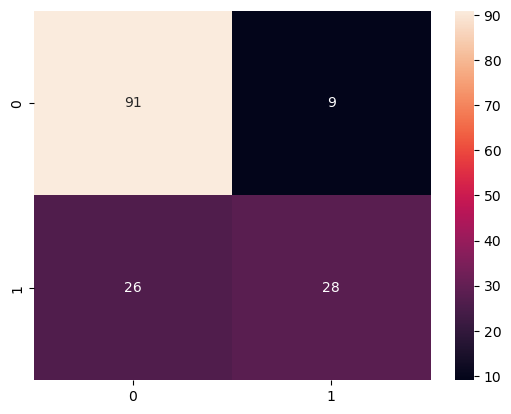

In [24]:
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot = True)


In [25]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [26]:
input_data = (1,97,66,15,140,23.2,0.487,22)
input_np = np.asarray(input_data)
input_reshaped = input_np.reshape(1, -1)
std_data = scaler.fit_transform(input_reshaped)
prediction = classifier.predict(std_data)
if (prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is not diabetic


In [27]:
import pickle
filename = 'diabetes.sav'
pickle.dump(classifier, open(filename , 'wb'))

In [28]:
# Heart Disease Prediction Model

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
heart_disease_df = pd.read_csv('heart.csv')
# Displaying first 5 records of the dataset
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
heart_disease_df.shape

(303, 14)

In [31]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
heart_disease_df['target'].value_counts()


target
1    165
0    138
Name: count, dtype: int64

In [39]:
X = heart_disease_df.drop(columns = 'target',axis = 1)
Y = heart_disease_df['target']
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 2)
# Finding size of training and test data
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [41]:
heart_model = LogisticRegression()
# Training the model
heart_model.fit(X_train.values, Y_train.values)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
X_train_prediction = heart_model.predict(X_train.values)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train.values)
# Displaying accuracy score on the training data
print("Accuracy on training data :- ",train_data_accuracy)

Accuracy on training data :-  0.8512396694214877


In [43]:
X_test_prediction = heart_model.predict(X_test.values)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test.values)
# Displaying accuracy score on the testing data
print("Accuracy on test data :- ",test_data_accuracy)

Accuracy on test data :-  0.819672131147541


<Axes: >

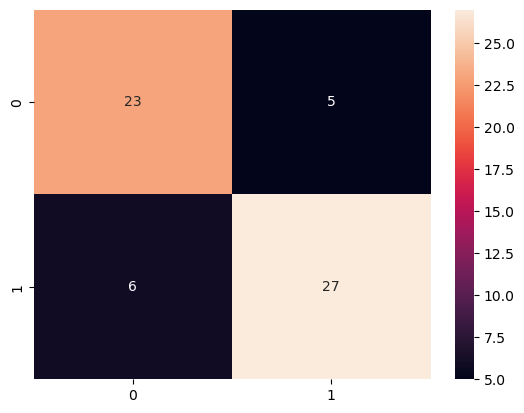

In [44]:
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True)

In [47]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [48]:
input_data = (70,1,1,156,245,0,2,143,0,0,0,0,0)
input_np = np.asarray(input_data)
input_reshaped = input_np.reshape(1, -1)
prediction = heart_model.predict(input_reshaped)
# printing the prediction
if (prediction[0] == 0):
    print("The person does not have any heart disease")
else:
    print("The person has heart disease")

The person has heart disease


In [50]:
import pickle
filename = 'Heart Disease Prediction.sav'
pickle.dump(heart_model, open(filename, 'wb'))

In [51]:
#Parkinson's Disease Prediction

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Importing the dataset on to a dataframe
parkinson = pd.read_csv('Parkinson disease.csv')
# Displaying the first five records
parkinson.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [54]:
parkinson.shape

(195, 24)

In [55]:
parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [56]:
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [57]:
parkinson['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [60]:
X = parkinson.drop(columns = ['name', 'status'],axis = 1)
Y = parkinson['status']
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [61]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 2)
# Finding size of training and test data
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [63]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

In [64]:
scaler.fit_transform(X_test)

array([[-1.27434768e+00, -7.92100902e-01, -6.42064804e-01,
        -3.70550081e-02,  7.65593976e-01, -5.36663194e-02,
         2.70521702e-01, -5.17113412e-02, -1.73362776e-01,
        -1.84537779e-01, -2.46162360e-01, -9.53432617e-02,
         3.51764171e-02, -2.46253875e-01, -2.42578071e-01,
        -5.71526263e-01,  1.17904437e+00,  1.05108661e+00,
         5.45105104e-01,  2.12053870e+00,  2.20220746e-01,
         6.73407367e-01],
       [-9.93036290e-01, -7.55457877e-01, -6.02839911e-01,
         2.21517439e+00,  2.37519856e+00,  2.52231701e+00,
         1.86180632e+00,  2.52056878e+00,  6.63120841e-01,
         1.31330947e+00,  8.25344625e-01,  4.41243374e-01,
         3.16150237e-01,  8.25821477e-01,  7.63822230e-01,
        -1.17294582e+00,  9.93607948e-01,  1.27956439e+00,
         9.15137942e-01,  4.60066283e-01,  1.91967718e-01,
         1.05151668e+00],
       [-9.59040068e-01, -4.67857304e-01, -5.93333267e-01,
         1.66162458e+00,  1.97279742e+00,  1.61932286e+00,
    

In [67]:
parkinson_model = svm.SVC(kernel = 'linear')
parkinson_model.fit(X_train.values, Y_train.values)
#SVC(kernel='linear')

SVC(kernel='linear')

In [69]:
X_train_prediction = parkinson_model.predict(X_train.values)
train_data_accuracy = accuracy_score(Y_train.values, X_train_prediction)
# Displaying accuracy score on the training data
print("Accuracy on training data :- ",train_data_accuracy

Accuracy on training data :-  0.8717948717948718


In [70]:
X_test_prediction = parkinson_model.predict(X_test.values)
test_data_accuracy = accuracy_score( Y_test.values, X_test_prediction)
# Displaying accuracy score on the testing data
print("Accuracy on testing data :- ",test_data_accuracy)

Accuracy on testing data :-  0.8717948717948718


<Axes: >

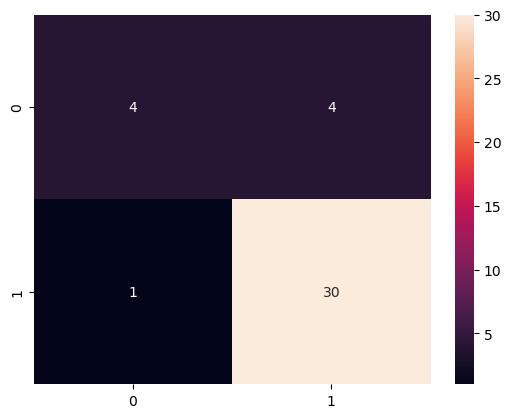

In [71]:
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True)

In [72]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39



In [75]:
input_data =(117.274,129.916,110.402,0.00752,0.00006,0.00299,0.00469,0.00898,0.02293,0.221,0.01189,0.01459,0.01948,0.03568,0.00681,22.817,0.530529,0.817756,-
4.60826,0.290024,2.021591,0.314464)
input_np = np.asarray(input_data)
input_reshaped = input_np.reshape(1, -1)
standardized_data = scaler.fit_transform(input_reshaped)
prediction = parkinson_model.predict(standardized_data)
if (prediction[0] == 0):
    print("The person does not have Parkinson's disease")
else:
    print("The person has Parkinson's disease")

The person has Parkinson's disease


In [76]:
import pickle
filename = 'Parkinson disease prediction.sav'
pickle.dump(parkinson_model, open(filename, 'wb'))